In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature

/Users/tanmayk/.pyenv/versions/3.9.1/envs/DAV/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
# Read flight data from excel file
airport_data = pd.read_csv("data/Airports.csv", encoding="unicode_escape")
flights_data = pd.read_excel("data/Flight Data.xlsx")

In [5]:
airport_data.head()


,id,label,country,Lat,Lon
0,BIN,Bamyan,Afghanistan,34.800000,67.816667
1,BST,Lashkar Gah,Afghanistan,31.582998,64.360000
2,CCN,Chaghcharan,Afghanistan,34.516701,65.250001
3,DAZ,Darwaz,Afghanistan,38.466667,70.883333
4,FAH,Farah,Afghanistan,32.391730,62.096819


In [18]:
airport_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9033 entries, 0 to 9032
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       9033 non-null   object 
 1   label    9033 non-null   object 
 2   country  9033 non-null   object 
 3   Lat      9033 non-null   float64
 4   Lon      9033 non-null   float64
dtypes: float64(2), object(3)
memory usage: 353.0+ KB


In [27]:
airport_data.columns

Index(['id', 'label', 'country', 'Lat ', 'Lon'], dtype='object')

In [28]:
airport_data[['label', 'country']].describe(include="O")


,label,country
count,9033,9033
unique,8851,262
top,London (GB),United States
freq,6,1974


In [41]:
airport_data.country.value_counts().iloc[:10]

United States         1974
Australia              609
Canada                 534
Papua New Guinea       376
Brazil                 282
China                  242
Indonesia              211
Russian Federation     179
Colombia               161
France                 141
Name: country, dtype: int64

<AxesSubplot:>

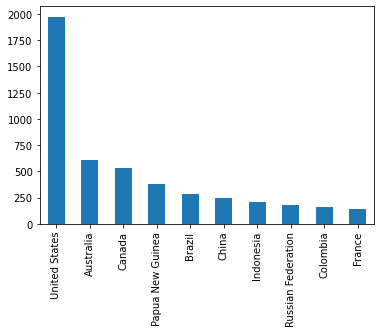

In [42]:
airport_data.country.value_counts().iloc[:10].plot(kind="bar")

In [4]:
airport_data.columns = ["ID", "CITY", "COUNTRY", "LAT", "LNG"]

In [65]:
airport_data[airport_data.COUNTRY == "France"]

,ID,CITY,COUNTRY,LAT,LNG
2816,AGF,Agen,France,44.200414,0.633336
2817,AHZ,Alpe D Huez,France,45.083333,6.083333
2818,AJA,Ajaccio,France,41.927065,8.728294
2819,ANE,Angers,France,47.560278,-0.312222
2820,ANG,Brie-Champniers,France,45.666667,0.200000
...,...,...,...,...,...
2952,XYV,Lyon Satolas Rail Svc,France,45.750000,4.850000
2953,XZN,Avignon Railway,France,46.400000,5.833333
2954,ZAO,Laberandie,France,44.333333,1.483333
2955,ZFJ,Rennes,France,48.100021,-1.670012


/Users/tanmayk/.pyenv/versions/3.9.1/envs/DAV/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/tanmayk/.pyenv/versions/3.9.1/envs/DAV/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


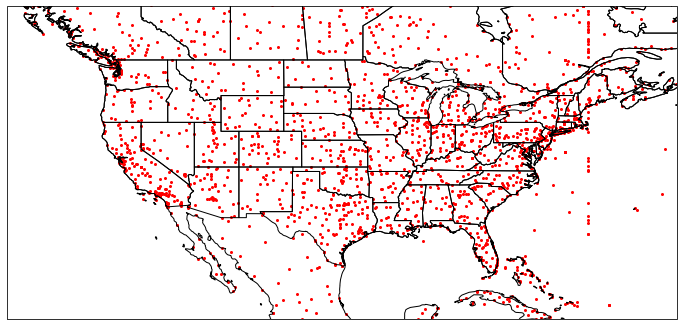

In [63]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.set_extent(
    [-135, -60, 20, 55],
    crs=crs.PlateCarree()
)

# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=airport_data.LNG,
    y=airport_data.LAT,
    color="red",
    s=4,
    alpha=1,
    transform=crs.PlateCarree()
)
plt.show()

In [66]:
flights_data.head()

,Source,Source City,Source Country,Target,Target City,Target Country,Weight,TimeSeries
0,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,9864,2003-07-01
1,PXO,Porto Santo,Portugal,FNC,Funchal,Portugal,9864,2003-07-01
2,AEP,Buenos Aires,Argentina,MVD,Montevideo,Uruguay,1463,2003-07-01
3,MVD,Montevideo,Uruguay,AEP,Buenos Aires,Argentina,1463,2003-07-01
4,AEP,Buenos Aires,Argentina,ROS,Rosario (AR),Argentina,2261,2003-07-01


In [68]:
flights_data["Source Country"].value_counts().iloc[:10]

USA                   107507
China                  29812
Germany                26216
Spain                  21523
United Kingdom         19506
Canada                 15219
Russian Federation     14983
France                 13615
Italy                  13196
Japan                  10539
Name: Source Country, dtype: int64

In [5]:
source_US_cities = flights_data[(flights_data["Source Country"] == "USA")]["Source"].unique()
dest_US_cities = flights_data[(flights_data["Target Country"] == "USA")]["Target"].unique()
all_US_cities = np.union1d(source_US_cities, dest_US_cities)

In [6]:
airports_US = airport_data[airport_data.ID.isin(all_US_cities)]

In [163]:
airports_US = airports_US[(airports_US.LNG != -70) & (~airports_US.ID.isin(['TVF', 'KSR']))]

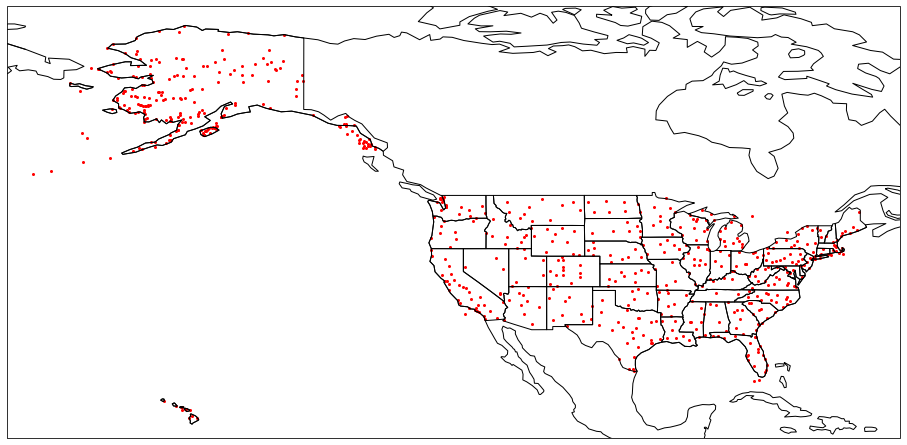

In [171]:
figure = plt.figure(figsize=(16,16))
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)


# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=airports_US.LNG,
    y=airports_US.LAT,
    color="red",
    s=4,
    alpha=1,
    transform=crs.PlateCarree()
)

plt.show()

In [234]:
airport_data[airport_data.ID == "ILE"]

,ID,CITY,COUNTRY,LAT,LNG


In [207]:
flights_data[(flights_data["Target"] == "HYL") | (flights_data["Source"] == "HYL")]

,Source,Source City,Source Country,Target,Target City,Target Country,Weight,TimeSeries
210,HYL,Hollis,USA,KLW,Klawock,USA,434,2003-07-01
211,KLW,Klawock,USA,HYL,Hollis,USA,434,2003-07-01
212,HYL,Hollis,USA,KTN,Ketchikan,USA,434,2003-07-01
213,KTN,Ketchikan,USA,HYL,Hollis,USA,434,2003-07-01
59929,HYL,Hollis,USA,KTN,Ketchikan,USA,1200,2003-07-01
59930,KTN,Ketchikan,USA,HYL,Hollis,USA,1200,2003-07-01
59933,KTN,Ketchikan,USA,HYL,Hollis,USA,132,2003-07-01
59948,HYL,Hollis,USA,CGA,Craig,USA,132,2003-07-01
60732,HYL,Hollis,USA,KLW,Klawock,USA,434,2004-07-01
60733,KLW,Klawock,USA,HYL,Hollis,USA,434,2004-07-01


In [133]:
flights_data[(flights_data["Target Country"] == "USA") & (flights_data["Target"] == "XLS")]

,Source,Source City,Source Country,Target,Target City,Target Country,Weight,TimeSeries


In [252]:
airports_US

,ID,CITY,COUNTRY,LAT,LNG
6797,ABE,Allentown/Bethlehem/Easton,United States,40.652222,-75.440278
6798,ABI,Abilene,United States,32.416667,-99.683333
6799,ABL,Ambler,United States,67.086485,-157.851409
6800,ABQ,Albuquerque,United States,35.104975,-106.641331
6801,ABR,Aberdeen (US),United States,45.450000,-98.433333
...,...,...,...,...,...
8728,XNA,Fayetteville (US) AR,United States,36.281667,-94.306667
8734,YAK,Yakutat,United States,59.547307,-139.727218
8736,YKM,Yakima,United States,46.566667,-120.533333
8738,YNG,Youngstown,United States,41.099699,-80.649739


In [162]:
~airports_US.ID.isin(['TVF', 'KSR'])

6797    True
6798    True
6799    True
6800    True
6801    True
        ... 
8728    True
8734    True
8736    True
8738    True
8739    True
Name: ID, Length: 704, dtype: bool

In [19]:
us_internal_flights = flights_data[(flights_data["Source Country"] == "USA") & (flights_data["Target Country"] == "USA") & (flights_data["Source"].isin(airport_data.ID)) & (flights_data["Target"].isin(airport_data.ID))]
us_edges = us_internal_flights[["Source", "Target", "Weight"]]
us_edges

,Source,Target,Weight
13,SOV,KEB,144
14,HOM,SOV,184
15,SOV,HOM,40
16,PGM,HOM,144
17,KEB,PGM,144
...,...,...,...
489200,ISN,CDR,1860
489201,MCE,ONT,950
489202,ONT,MCE,950
489203,SLN,DDC,589


In [23]:
us_graph = nx.from_pandas_edgelist(us_edges, "Source", "Target", edge_attr="Weight")
print(len(us_graph.nodes()), len(us_graph.edges()))

708 4204


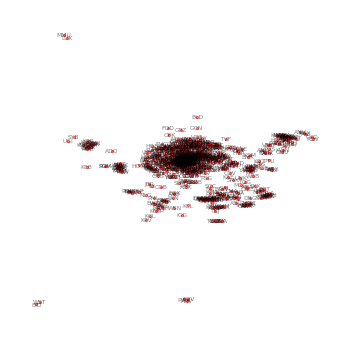

In [255]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(us_graph, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5, node_color='red', edge_color='white',)
ax.set_axis_off()

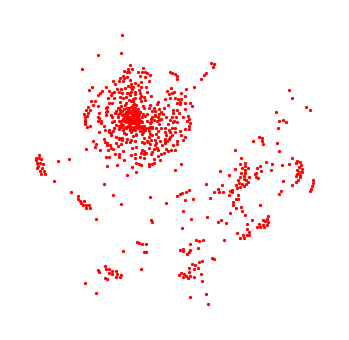

In [278]:
us_sub_graph = next(us_graph.subgraph(c).copy() for c in nx.connected_components(us_graph))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(us_sub_graph, ax=ax, with_labels=False,
                 node_size=5, width=.5, node_color='red', edge_color='white',)
ax.set_axis_off()

In [279]:
pos = {v['ID']: (v['LNG'], v['LAT'])
       for airport, v in
       airports_US.to_dict('index').items()}

In [204]:
pos['HYL']

KeyError: 'HYL'

In [280]:
deg = nx.degree(us_sub_graph)
sizes = [5 * deg[iata] for iata in us_sub_graph.nodes]

In [281]:
labels = {iata: iata if deg[iata] >= 150 else ''
          for iata in us_sub_graph.nodes}

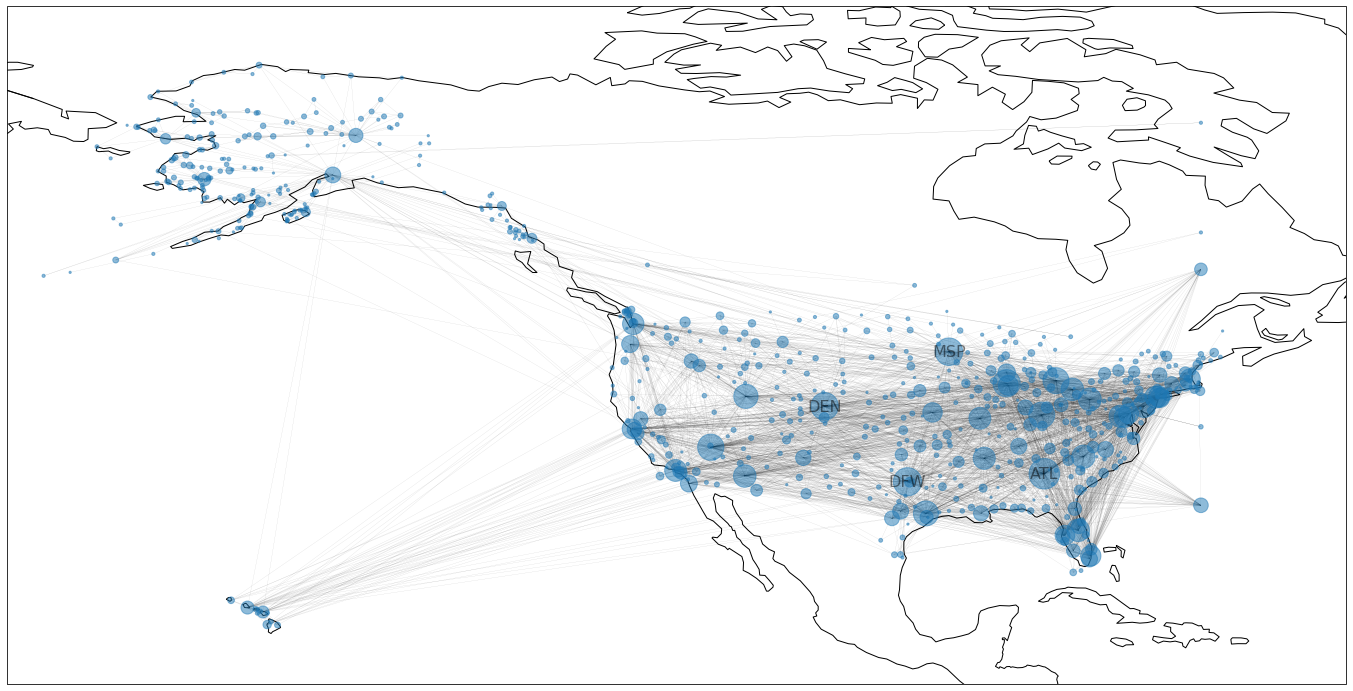

In [282]:
# Map projection
fig, ax = plt.subplots(
    1, 1, figsize=(24, 24),
    subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines()

nx.draw_networkx(us_sub_graph, ax=ax,
                 font_size=16,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 pos=pos,
                 cmap=plt.cm.autumn, labels=labels)

In [300]:
airport_data.COUNTRY.value_counts()[:20]

United States         1974
Australia              609
Canada                 534
Papua New Guinea       376
Brazil                 282
China                  242
Indonesia              211
Russian Federation     179
Colombia               161
France                 141
United Kingdom         135
India                  133
Germany                115
Japan                  102
Argentina               99
Mexico                  98
South Africa            89
Sweden                  73
Italy                   72
Philippines             70
Name: COUNTRY, dtype: int64

In [293]:
flights_data["Source Country"].value_counts()

USA                                     107507
China                                    29812
Germany                                  26216
Spain                                    21523
United Kingdom                           19506
                                         ...  
Tuvalu                                       7
Saint Martin                                 6
Montserrat, Leeward Islands                  5
United States Minor Outlying Islands         2
Palestine                                    1
Name: Source Country, Length: 230, dtype: int64

In [1]:
def plot_country_network(
    country_name: str, country_code: str, airports_data: pd.DataFrame, flights_data: pd.DataFrame
) -> nx.Graph:
    """
    Plot the network of airports in a country.
    """
    # Select airports in the country
    airports_country = airports_data[airports_data.COUNTRY == country_name]
    # Select flights between airports in the country
    flights_country = flights_data[
        (flights_data["Source Country"] == country_code)
        & (flights_data["Target Country"] == country_code)
        & (flights_data["Source"].isin(airports_country.ID))
        & (flights_data["Target"].isin(airports_country.ID))
    ]
    edges = flights_country[["Source", "Target"]].values

    # Build the network
    country_graph = nx.from_edgelist(edges)
    print(f"{country_name}: {len(country_graph.nodes())} airports, {len(country_graph.edges())} flights")
    # Generate connected components subgraphs
    sub_graph = next(
        country_graph.subgraph(c).copy() for c in nx.connected_components(country_graph)
    )

    # Create metadata for coordinates
    pos = {
        v["ID"]: (v["LNG"], v["LAT"])
        for airport, v in airports_country.to_dict("index").items()
    }

    # Generate node sizes on degree
    deg = nx.degree(sub_graph)
    sizes = [5 * deg[iata] for iata in sub_graph.nodes]

    # Plot the network


    fig, ax = plt.subplots(
        1, 1, figsize=(24, 24), subplot_kw=dict(projection=crs.PlateCarree())
    )
    ax.coastlines()

    nx.draw_networkx(
        sub_graph,
        ax=ax,
        font_size=16,
        alpha=0.5,
        width=0.075,
        node_size=sizes,
        pos=pos,
        cmap=plt.cm.autumn,
        with_labels=False,
    )

    return country_graph


NameError: name 'pd' is not defined

United States: 708 airports, 4204 flights


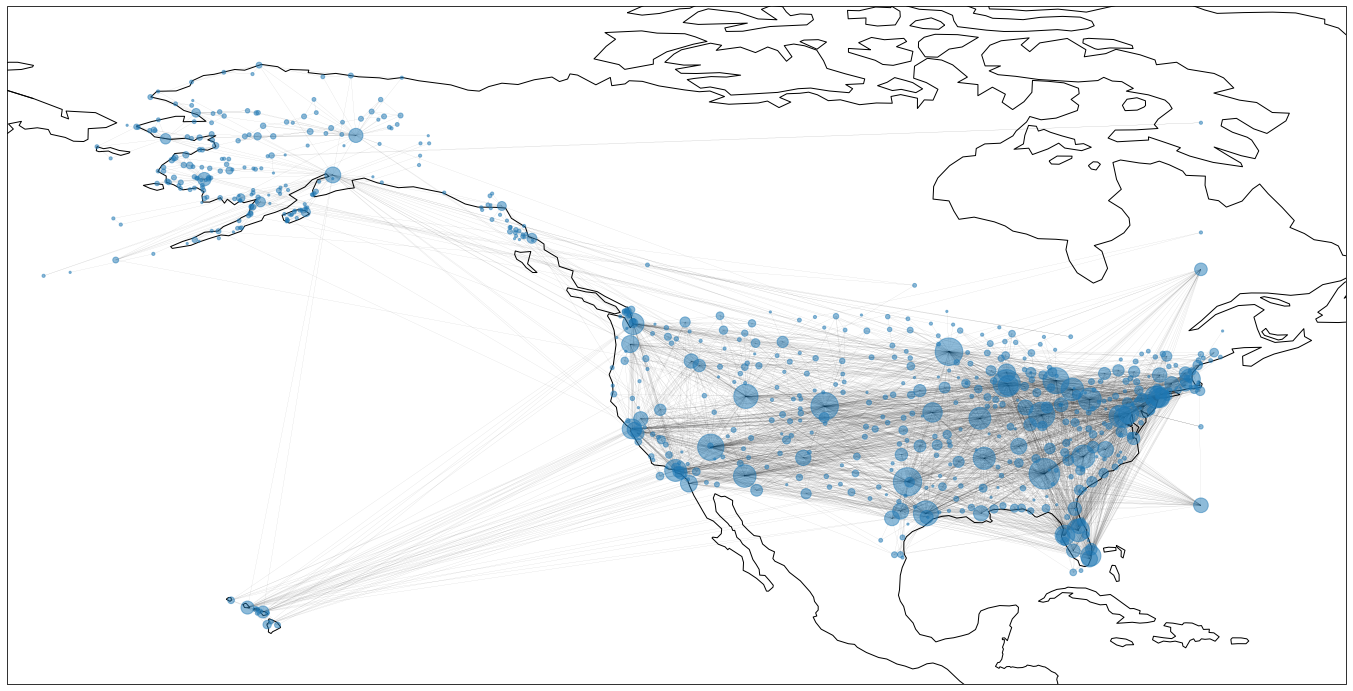

In [302]:
plot_country_network("United States", "USA", airport_data, flights_data)

China: 159 airports, 1202 flights


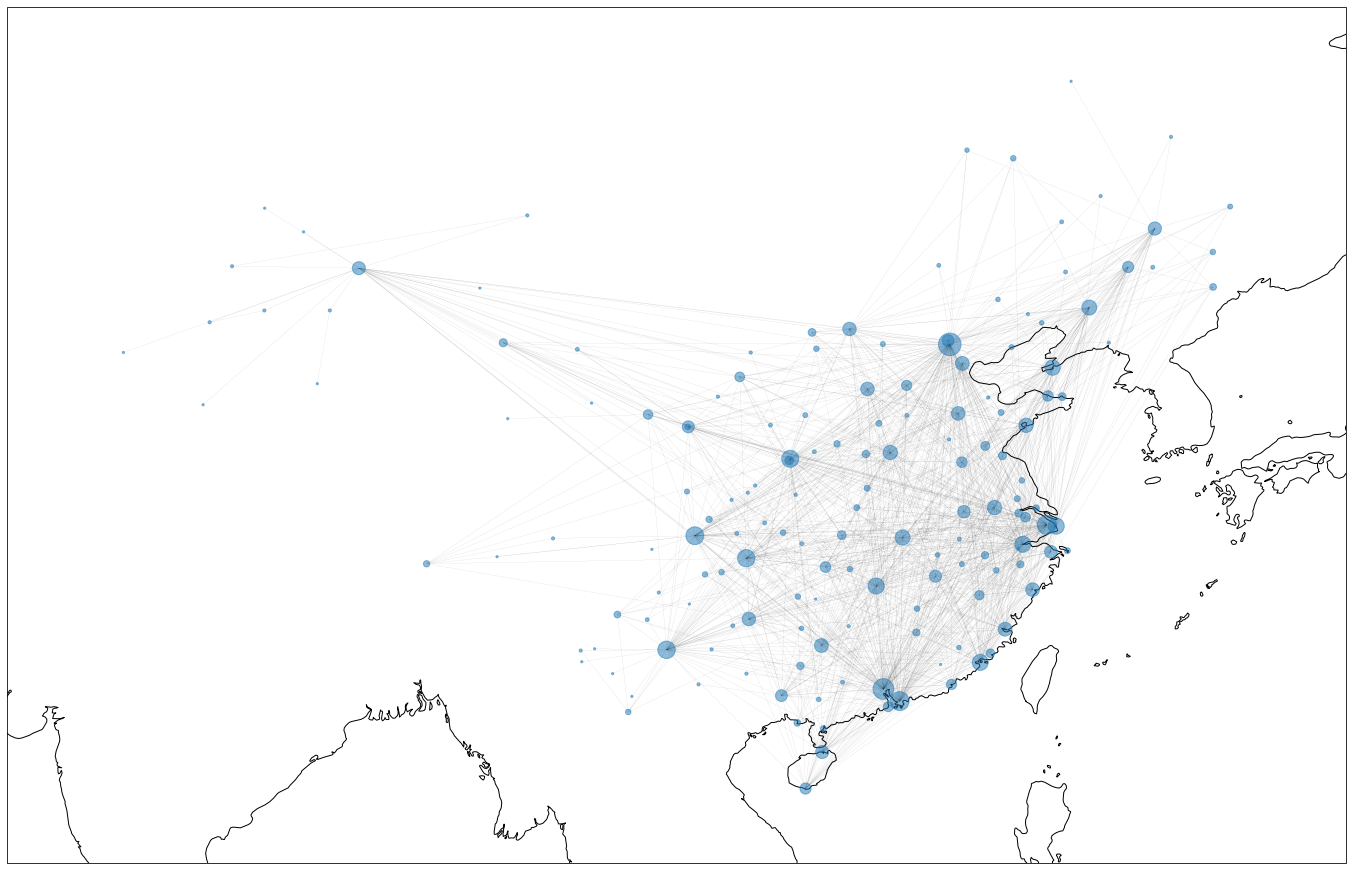

In [298]:
plot_country_network("China", "China", airport_data, flights_data)

United Kingdom: 72 airports, 325 flights


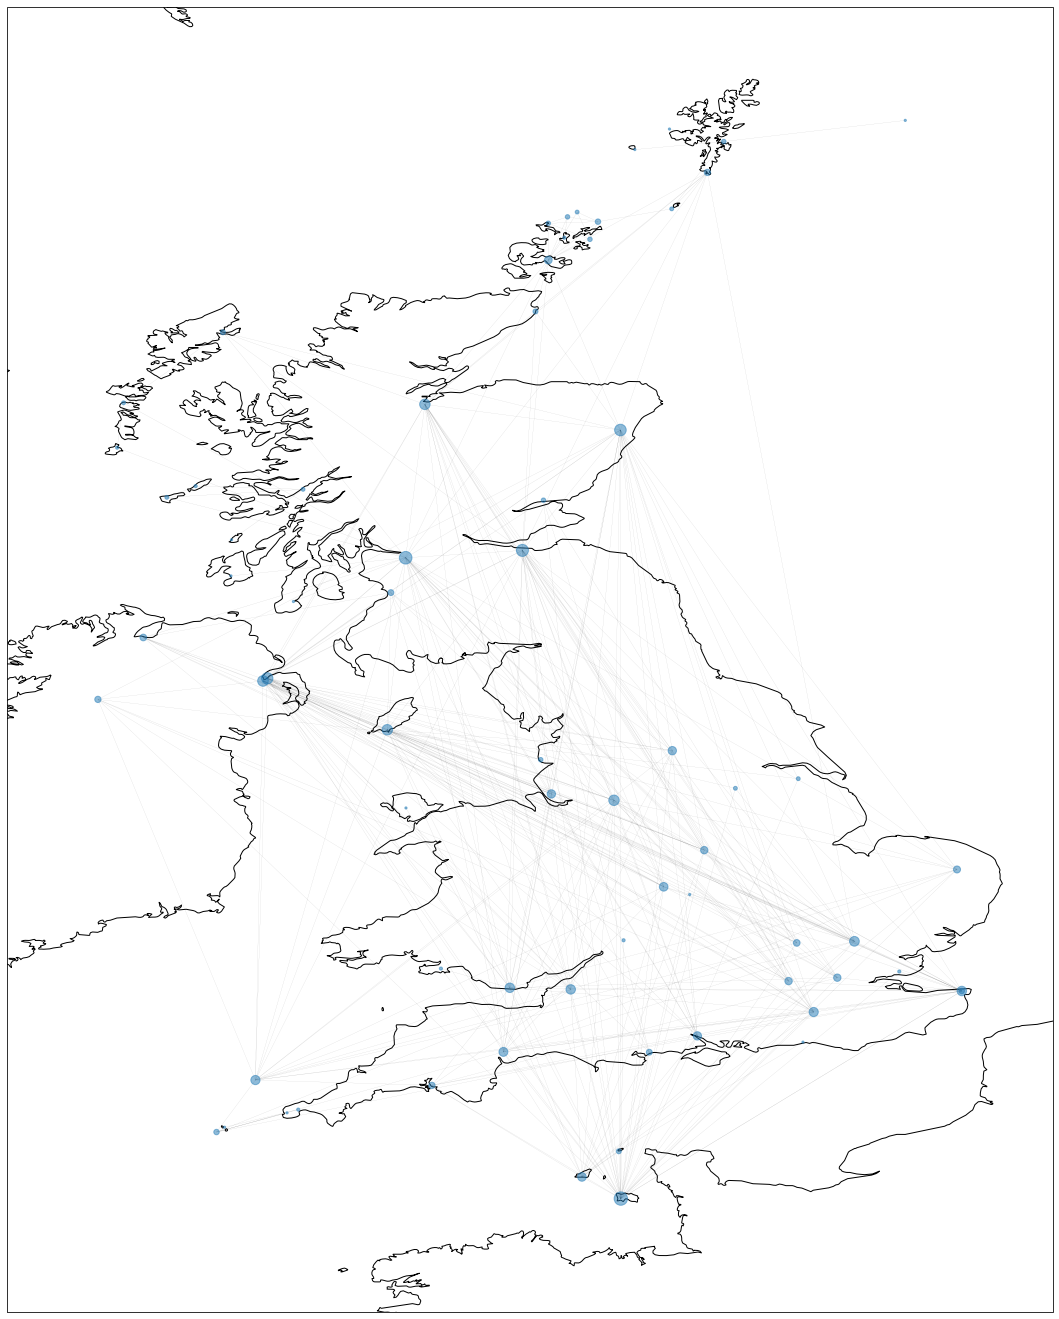

In [303]:
plot_country_network("United Kingdom", "United Kingdom", airport_data, flights_data)

Australia: 170 airports, 402 flights


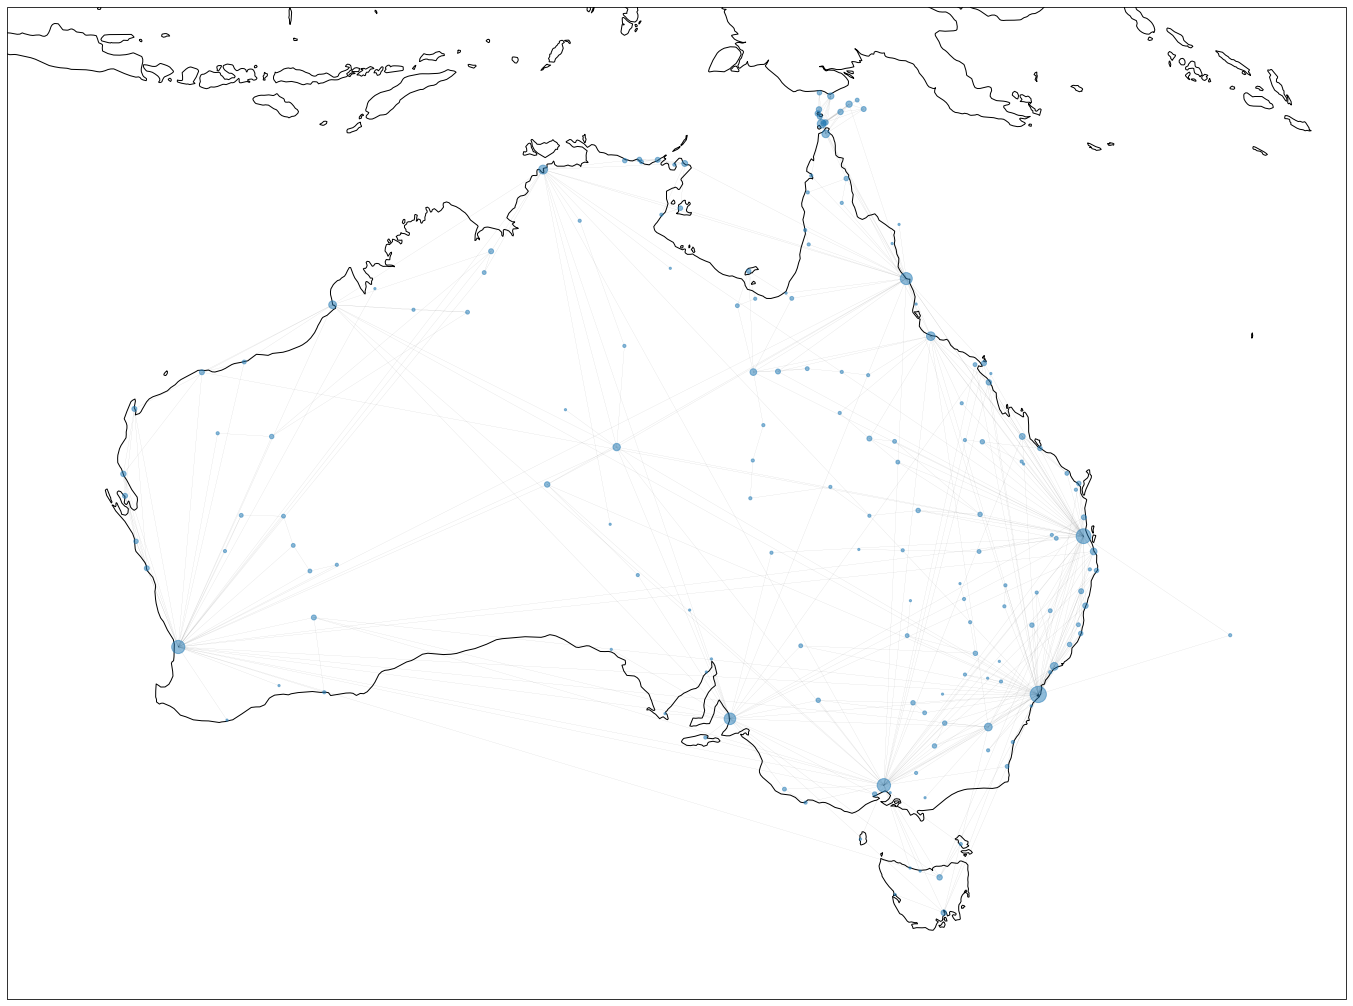

In [304]:
plot_country_network("Australia", "Australia", airport_data, flights_data)

## Degree distribution

In [4]:
degrees = [d for n, d in nx.degree(us_graph, weight="Weight")]

NameError: name 'us_graph' is not defined

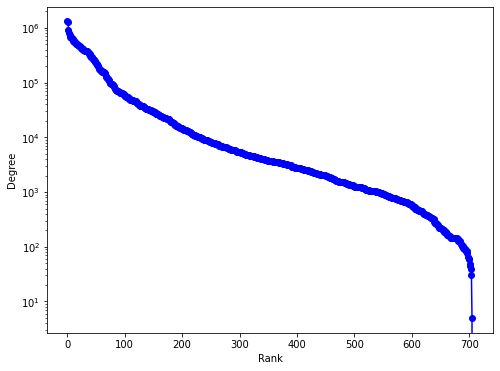

In [64]:
sorted_degrees = sorted(degrees, reverse=True)
fig, ax = plt.subplots(
    1, 1, figsize=(8, 6)
)
ax.plot(sorted_degrees, "b-", marker="o")
ax.set_ylabel("Degree")
ax.set_xlabel("Rank")
ax.set_yscale("log")
plt.show()


In [32]:
betweenness = nx.betweenness_centrality(us_graph)


{'SOV': 0.0013983996538059315,
 'KEB': 0.0,
 'HOM': 0.008414439177628815,
 'PGM': 0.0013983996538059315,
 'AET': 1.0017189497177157e-05,
 'AKP': 0.0,
 'ANC': 0.39488626614674543,
 'GAL': 0.007363414056515848,
 'ANI': 0.027475586201159297,
 'SHX': 0.0027934602444461376,
 'BTI': 0.0,
 'FAI': 0.10367935415541564,
 'SCC': 0.0007153024651011618,
 'RSH': 2.2037816893789747e-05,
 'HCR': 0.002799470558144444,
 'BET': 0.0794281490979027,
 'AIN': 7.01203264802401e-06,
 'BRW': 0.008585123702003997,
 'KLG': 0.0001328947139958836,
 'FYU': 7.01203264802401e-06,
 'DLG': 0.032962296634357915,
 'KYU': 1.0017189497177157e-06,
 'NUI': 0.0,
 'RBY': 0.00018579850020458238,
 'TAL': 0.00021238857321431132,
 'PIZ': 4.5678384107127824e-05,
 'HSL': 0.00023467049442136732,
 'NUL': 0.00040640040848769,
 'KAL': 1.0017189497177157e-06,
 'ATK': 0.0,
 'ANV': 3.339063165725719e-06,
 'KGX': 2.0034378994354314e-06,
 'ESD': 0.0037776075953909055,
 'LPS': 4.043465196922177e-05,
 'FRD': 0.002820148693639477,
 'BFI': 0.0036

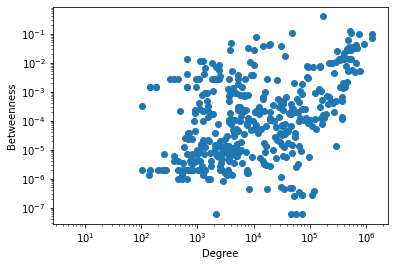

In [65]:
plt.plot(degrees, betweenness.values(), "o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Betweenness")
plt.show()

In [66]:
airport_data[airport_data.ID == "MME"]

,ID,CITY,COUNTRY,LAT,LNG
6744,MME,Durham,United Kingdom,54.398889,-7.633333
